# The Quench Experiments

Starting from the state $\ket{Z_i}$ we first evolve with a $P_0$ distribution over measurments for some number of full steps (in ubits of system size) and then switch to the probed distribution $P_1$.

The measurements done will be:
1. Topological Entanglement Entropy
2. Topological Entanglement Negativity

In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("AdditionalStructure/NewTypes.jl")
include("AdditionalStructure/BitStringOps.jl")
include("AdditionalStructure/Measurements.jl")
include("AdditionalStructure/MICModels.jl")
include("AdditionalStructure/ModelRuns.jl")
include("AdditionalStructure/Iterators.jl");

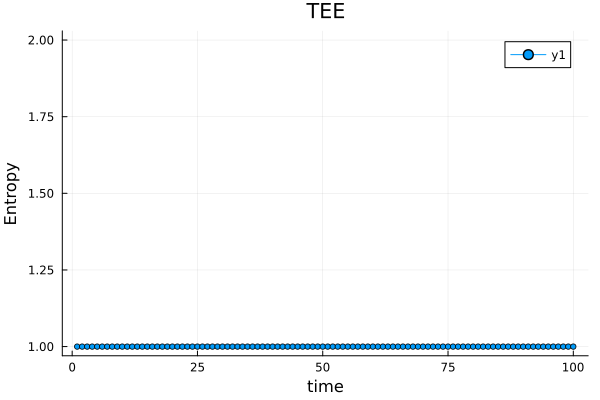

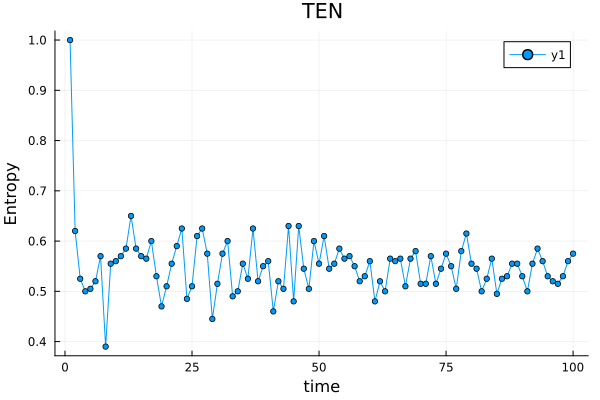

[1.0 0.62 0.525 0.5 0.505 0.52 0.57 0.39 0.555 0.56 0.57 0.585 0.65 0.585 0.57 0.565 0.6 0.53 0.47 0.51 0.555 0.59 0.625 0.485 0.51 0.61 0.625 0.575 0.445 0.515 0.575 0.6 0.49 0.5 0.555 0.525 0.625 0.52 0.55 0.56 0.46 0.52 0.505 0.63 0.48 0.63 0.545 0.505 0.6 0.555 0.61 0.545 0.555 0.585 0.565 0.57 0.55 0.52 0.53 0.56 0.48 0.52 0.5 0.565 0.56 0.565 0.51 0.565 0.58 0.515 0.515 0.57 0.515 0.545 0.575 0.55 0.505 0.58 0.615 0.555 0.545 0.5 0.525 0.565 0.495 0.525 0.53 0.555 0.555 0.53 0.5 0.555 0.585 0.56 0.53 0.52 0.515 0.53 0.56 0.575][1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]

In [2]:
# Toric Code 

stab_distro_intial = Categorical([1/2, 1/2, 0, 0, 0, 0, 0, 0]) 
# Probability Distros over Stabiliser used to define the TC anyon Profileration. Very TC specific!
p_b = 0 # Boson Measurement
p_f = 0.1 # Fermion Measurement
stab_distro_probed = Categorical([(1-p_b-p_f)/2, (1-p_b-p_f)/2, p_b/2, p_b/2, 0, 0, p_f/2, p_f/2])

subsystem = 4
system = Init_EdgeSquareLattice(subsystem)

anneal_steps = 20
quench_steps = 100 # Sample this lineraly (upgrade to log sampling if needed)
number_of_samples = 100
steps_per_sample = Int(quench_steps/number_of_samples)
sample_times = 1:steps_per_sample:quench_steps
number_of_runs = 100
TEEs = zeros(number_of_runs, number_of_samples)
TENs = zeros(number_of_runs, number_of_samples)

Threads.@threads for i_run = 1:number_of_runs
    state = MixedDestabilizer(Stabilizer(zeros(UInt8, system.nbits), 
                                        zeros(Bool, system.nbits, system.nbits), 
                                        Matrix(LinearAlgebra.I, system.nbits, system.nbits)))
    iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro_intial), anneal_steps)
    # Annealing the Z state to a TC logic state
    for i_sample = 1:number_of_samples
        TEEs[i_run, i_sample] = entanglement_entropy_topo(state, system)
        TENs[i_run, i_sample] = entanglement_negativity(state, system)
        iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro_probed), steps_per_sample)
    end
end

TENs = sum(TENs, dims=1)/number_of_runs
TEEs = sum(TEEs, dims=1)/number_of_runs

# plot entropy as function of time
p = plot(sample_times, TEEs',
    title="TEE",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3))
q = plot(sample_times, TENs',
    title="TEN",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3))
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
display(q)
print(TENs)
print(TEEs)


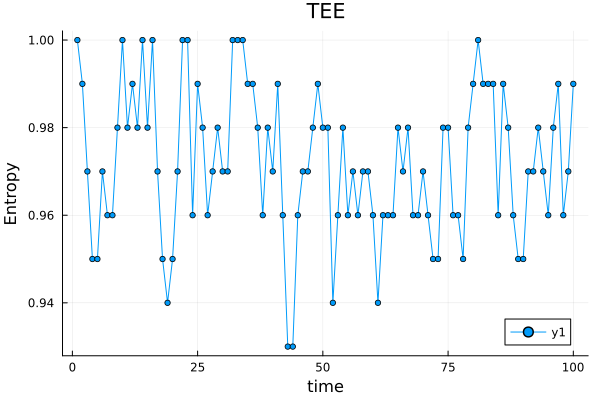

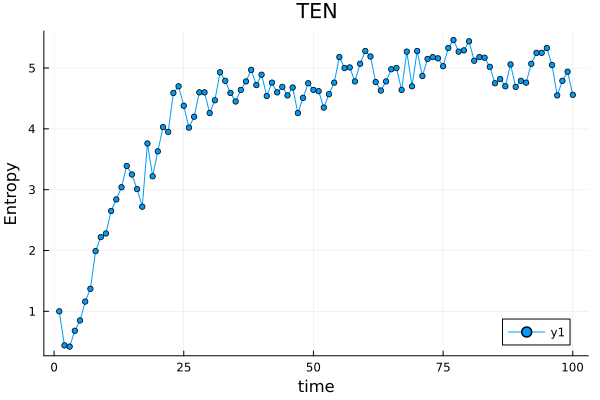

[1.0 0.44 0.42 0.68 0.85 1.16 1.37 1.99 2.22 2.28 2.65 2.84 3.04 3.39 3.25 3.01 2.72 3.76 3.22 3.63 4.03 3.95 4.59 4.7 4.38 4.02 4.2 4.6 4.6 4.26 4.47 4.93 4.79 4.59 4.45 4.64 4.78 4.97 4.72 4.89 4.54 4.76 4.6 4.69 4.55 4.68 4.26 4.51 4.75 4.64 4.62 4.35 4.57 4.76 5.18 5.0 5.01 4.78 5.07 5.28 5.19 4.77 4.63 4.78 4.98 5.0 4.64 5.27 4.7 5.28 4.87 5.15 5.18 5.16 5.03 5.33 5.46 5.27 5.29 5.44 5.12 5.18 5.17 5.02 4.75 4.82 4.7 5.06 4.69 4.79 4.76 5.07 5.25 5.25 5.33 5.05 4.55 4.79 4.94 4.56][1.0 0.99 0.97 0.95 0.95 0.97 0.96 0.96 0.98 1.0 0.98 0.99 0.98 1.0 0.98 1.0 0.97 0.95 0.94 0.95 0.97 1.0 1.0 0.96 0.99 0.98 0.96 0.97 0.98 0.97 0.97 1.0 1.0 1.0 0.99 0.99 0.98 0.96 0.98 0.97 0.99 0.96 0.93 0.93 0.96 0.97 0.97 0.98 0.99 0.98 0.98 0.94 0.96 0.98 0.96 0.97 0.96 0.97 0.97 0.96 0.94 0.96 0.96 0.96 0.98 0.97 0.98 0.96 0.96 0.97 0.96 0.95 0.95 0.98 0.98 0.96 0.96 0.95 0.98 0.99 1.0 0.99 0.99 0.99 0.96 0.99 0.98 0.96 0.95 0.95 0.97 0.97 0.98 0.97 0.96 0.98 0.99 0.96 0.97 0.99]

In [3]:
# Toric Code 

stab_distro_intial = Categorical([1/2, 1/2, 0, 0, 0, 0, 0, 0]) 
# Probability Distros over Stabiliser used to define the TC anyon Profileration. Very TC specific!
p_b = 0.1 # Boson Measurement
p_f = 0 # Fermion Measurement
stab_distro_probed = Categorical([(1-p_b-p_f)/2, (1-p_b-p_f)/2, p_b/2, p_b/2, 0, 0, p_f/2, p_f/2])

subsystem = 4
system = Init_EdgeSquareLattice(subsystem)

anneal_steps = 20
quench_steps = 100 # Sample this lineraly (upgrade to log sampling if needed)
number_of_samples = 100
steps_per_sample = Int(quench_steps/number_of_samples)
sample_times = 1:steps_per_sample:quench_steps
number_of_runs = 100
TEEs = zeros(number_of_runs, number_of_samples)
TENs = zeros(number_of_runs, number_of_samples)

Threads.@threads for i_run = 1:number_of_runs
    state = MixedDestabilizer(Stabilizer(zeros(UInt8, system.nbits), 
                                        zeros(Bool, system.nbits, system.nbits), 
                                        Matrix(LinearAlgebra.I, system.nbits, system.nbits)))
    iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro_intial), anneal_steps)
    # Annealing the Z state to a TC logic state
    for i_sample = 1:number_of_samples
        state_in = deepcopy(state)
        TEEs[i_run, i_sample] = entanglement_entropy_topo(state_in, system)
        TENs[i_run, i_sample] = entanglement_negativity(state, system)
        iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro_probed), steps_per_sample)
    end
end

TENs = sum(TENs, dims=1)/number_of_runs
TEEs = sum(TEEs, dims=1)/number_of_runs

# plot entropy as function of time
p = plot(sample_times, TEEs',
    title="TEE",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3))
q = plot(sample_times, TENs',
    title="TEN",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3))
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
display(q)
print(TENs)
print(TEEs)
